In [73]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from adjustText import adjust_text

## Read data

In [5]:
data_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\2_sensitivity_analysis\results"

In [108]:
class Si():
    def __init__(self, data_dir, case_name):
        self.data_dir = data_dir
        self.case_name = case_name

    def read_data(self):
        path = os.path.join(self.data_dir, self.case_name, "Si.csv")
        self.data = pd.read_csv(path, index_col=0)
    
    def plot_results(self, title):
        # Options for the graphic
        pltfont = {"fontname": "DejaVu Sans", "fontsize": 15}  # font for axes
        pltfont_leg = {"family": "DejaVu Sans", "size": 15}  # font for legend
        ms = 10  # Marker size
        col = (
            np.array(
                [
                    [215, 48, 39],
                    [252, 141, 89],
                    [145, 191, 219],
                    [69, 117, 180],
                ]
            )
            / 256
        )
        clrs = np.tile(col, (int(np.ceil(len(self.data)/ len(col))), 1))

        fig = plt.figure(figsize=(6,6))

        # First plot EEs mean & std as circles:
        # Check the error bar definition
        for i in range(len(self.data)):
            if i <= 3:
                markertype = "ok"
            elif i <= 7:
                markertype = "^"
            elif i <= 11: 
                markertype = "s"
            else:
                markertype = "x"
            plt.plot(
                self.data["mu_star"][i],
                self.data["sigma"][i],
                markertype,
                markerfacecolor=clrs[i],
                markersize=ms,
                markeredgecolor=clrs[i],
            )
            ax = plt.gca()

        texts = [plt.text(self.data["mu_star"][i], self.data["sigma"][i], self.data.index[i], ha='center', va='center', fontsize=10) for i in range(len(self.data))]
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

        # # Create legend:
        # plt.legend(
        #     self.data.index,
        #     prop=pltfont_leg,
        #     loc="center left",
        #     bbox_to_anchor=(1, 0.5),
        # )

        plt.xlabel("Mean of EEs", **pltfont)
        plt.ylabel("Standard deviation of EEs", **pltfont)
        plt.grid(linestyle="--")
        plt.xticks(**pltfont)
        plt.yticks(**pltfont)
        plt.title(title)
        plt.tight_layout()

        out_fn = "EET.png"
        out_path_plot = os.path.join(self.data_dir, self.case_name)
        plt.savefig(os.path.join(out_path_plot, out_fn), dpi=600, format="png")

## Plot

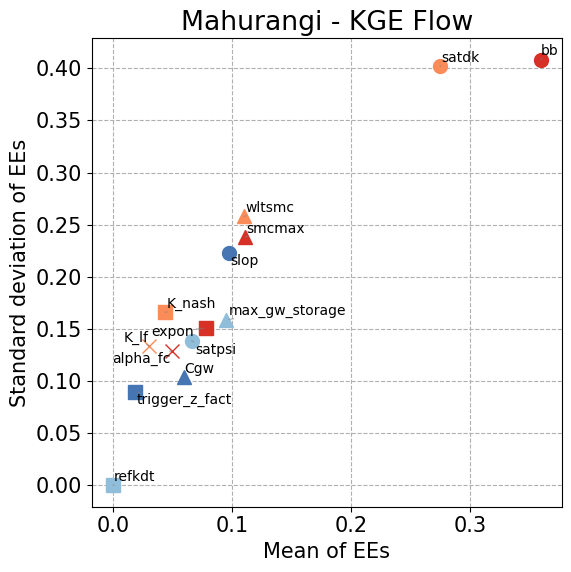

In [104]:
MH_KGE_Flow = Si(data_dir, "Mahurangi-2023-10-27-KGE-Flow")
MH_KGE_Flow.read_data()
MH_KGE_Flow.plot_results(title="Mahurangi - KGE Flow")

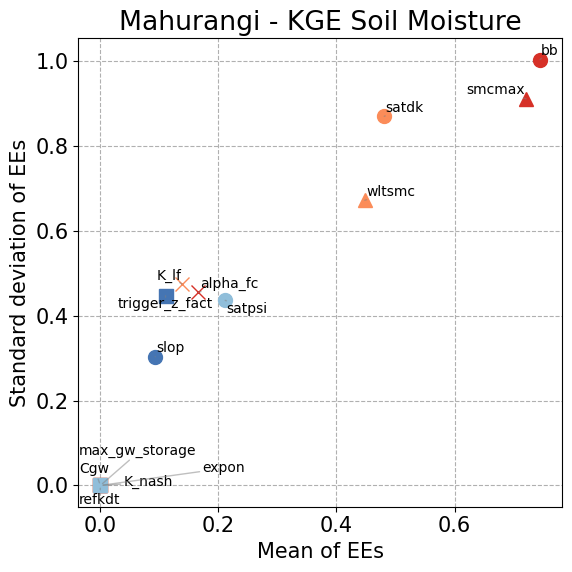

In [106]:
Si = Si(data_dir, "Mahurangi-2023-10-27-KGE-Soil Moisture Content")
Si.read_data()
Si.plot_results(title="Mahurangi - KGE Soil Moisture")

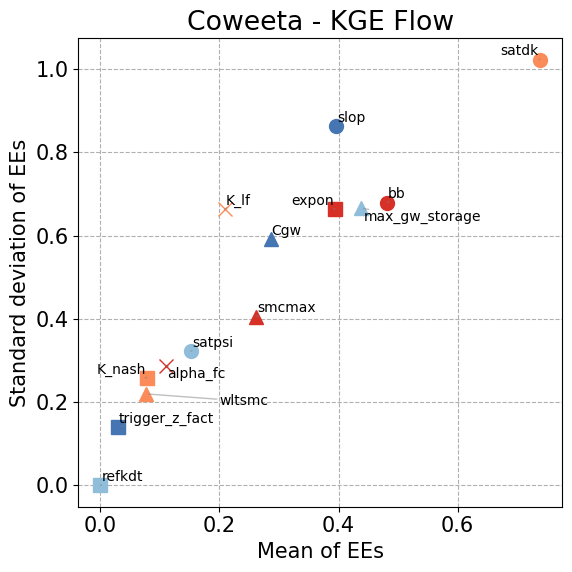

In [110]:
si = Si(data_dir, "Coweeta-2023-10-27-KGE-Flow")
si.read_data()
si.plot_results(title="Coweeta - KGE Flow")


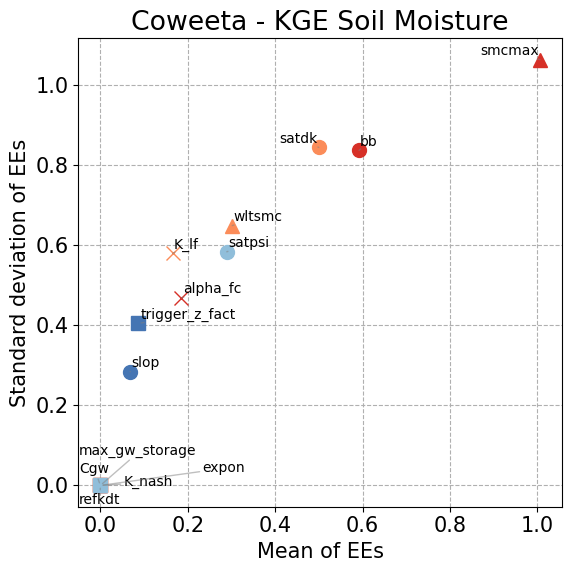

In [111]:
si = Si(data_dir, "Coweeta-2023-10-27-KGE-Soil Moisture Content")
si.read_data()
si.plot_results(title="Coweeta - KGE Soil Moisture")